In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [195]:
def cos_func(x):
    f_1 = 50
    f_2 = 150
    f_3 = 450
    w_1 = 2 * np.pi * f_1
    w_2 = 2 * np.pi * f_2
    w_3 = 2 * np.pi * f_3
    return np.cos(w_1 * x) + np.cos(w_2 * x) + np.cos(w_3 * x)

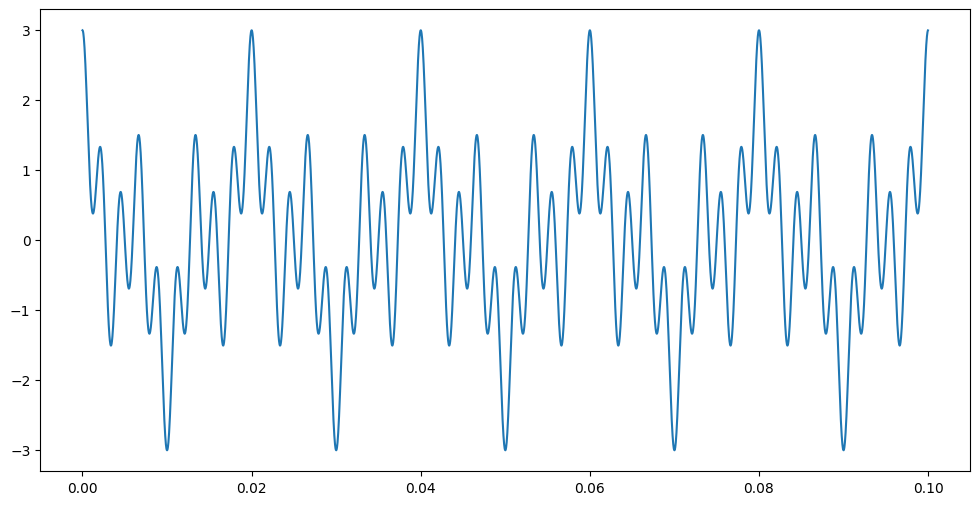

In [196]:
cos_args = np.arange(0, 0.1, 1 / 50000)
y_cos = cos_func(cos_args)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.show()

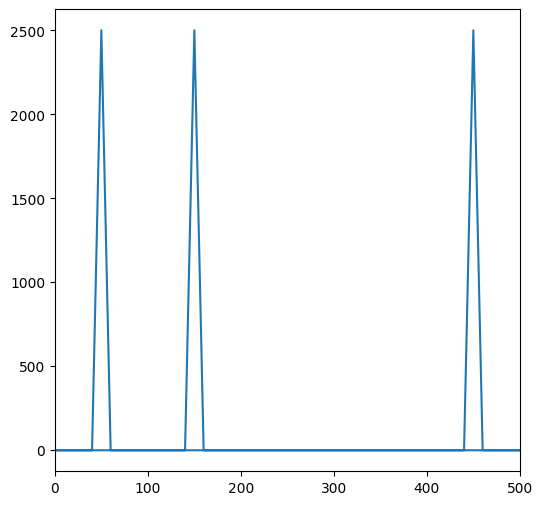

In [197]:
x_cos_fft = np.fft.fftfreq(len(cos_args), 0.1 / len(cos_args))
y_cos_fft = np.fft.fft(y_cos)

plt.figure(figsize=(6, 6))
plt.plot(x_cos_fft, np.abs(y_cos_fft))
plt.xlim([0, 500])
plt.show()

In [198]:
def butter_filter(w):
    return 1 / (w ** 2 + 1j * np.sqrt(2) * w + 1)

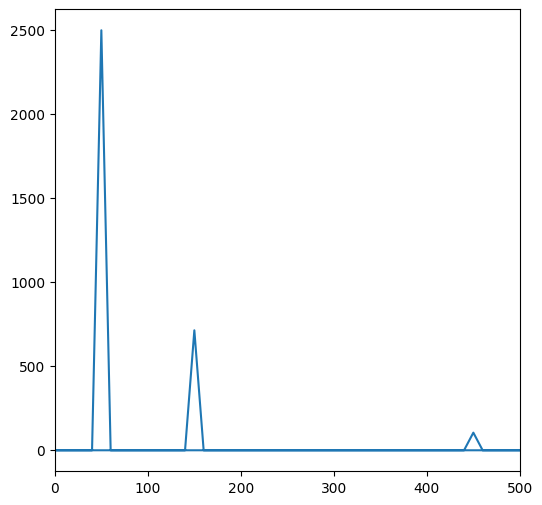

In [200]:
low_filtered_y_cos_fft_base = butter_filter(x_cos_fft / 70)
low_filtered_y_cos_fft = low_filtered_y_cos_fft_base * y_cos_fft
low_filtered_y_cos_fft /= max(low_filtered_y_cos_fft) / max(y_cos_fft)

plt.figure(figsize=(6, 6))
plt.xlim([0, 500])
plt.plot(x_cos_fft, np.abs(low_filtered_y_cos_fft))
plt.show()

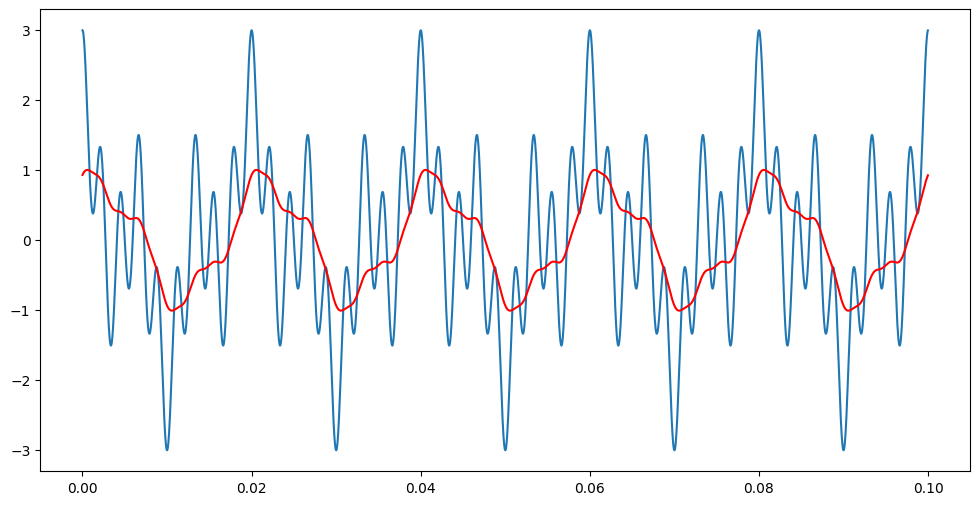

In [201]:
y_cos_from_low = np.fft.ifft(low_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_low, 'red')
plt.show()

C:\Users\zhukz\AppData\Local\Temp\ipykernel_11224\3897028013.py:1: RuntimeWarning: divide by zero encountered in divide
  high_filtered_y_cos_fft_base = butter_filter(300 / x_cos_fft)
C:\Users\zhukz\AppData\Local\Temp\ipykernel_11224\586530782.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1 / (w ** 2 + 1j * np.sqrt(2) * w + 1)
C:\Users\zhukz\AppData\Local\Temp\ipykernel_11224\586530782.py:2: RuntimeWarning: invalid value encountered in divide
  return 1 / (w ** 2 + 1j * np.sqrt(2) * w + 1)


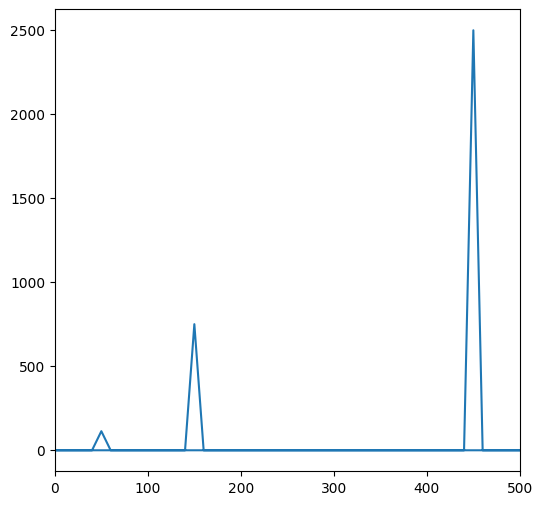

In [202]:
high_filtered_y_cos_fft_base = butter_filter(300 / x_cos_fft)
high_filtered_y_cos_fft_base[0] = 0
high_filtered_y_cos_fft = high_filtered_y_cos_fft_base * y_cos_fft
high_filtered_y_cos_fft /= max(high_filtered_y_cos_fft) / max(y_cos_fft)

plt.figure(figsize=(6, 6))
plt.xlim([0, 500])
plt.plot(x_cos_fft, np.abs(high_filtered_y_cos_fft))
plt.show()

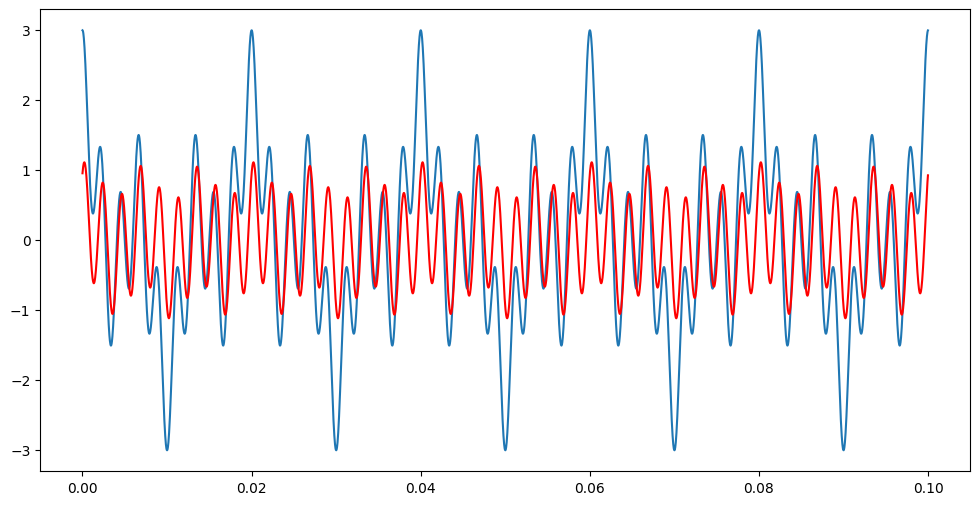

In [203]:
y_cos_from_high = np.fft.ifft(high_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_high, 'red')
plt.show()

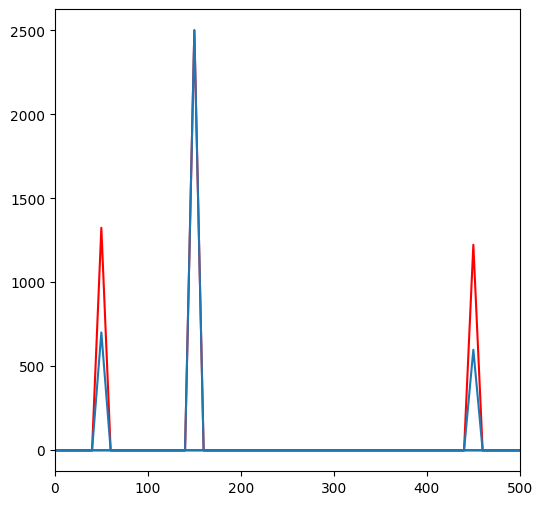

In [215]:
band_pass_filtered_y_cos_fft_base = low_filtered_y_cos_fft_base * high_filtered_y_cos_fft_base
band_pass_filtered_y_cos_fft = band_pass_filtered_y_cos_fft_base * y_cos_fft
band_pass_filtered_y_cos_fft /= max(band_pass_filtered_y_cos_fft) / max(y_cos_fft)

plt.figure(figsize=(6, 6))
plt.plot(x_cos_fft, np.abs(band_pass_filtered_y_cos_fft), 'red')
plt.xlim([0, 500])

band_pass_filtered_y_cos_fft *= band_pass_filtered_y_cos_fft_base
band_pass_filtered_y_cos_fft /= max(band_pass_filtered_y_cos_fft) / max(y_cos_fft)

plt.plot(x_cos_fft, np.abs(band_pass_filtered_y_cos_fft))

plt.show()

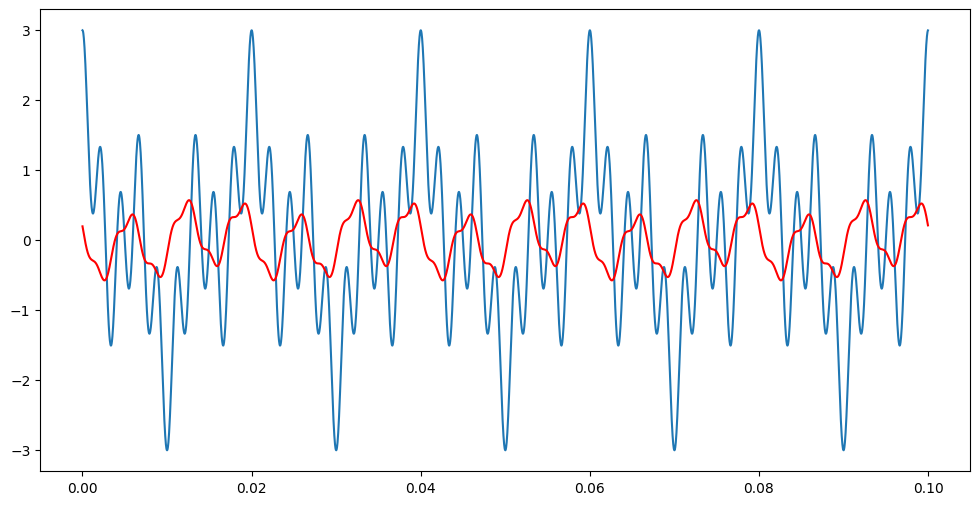

In [216]:
y_cos_from_band_pass = np.fft.ifft(band_pass_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_band_pass, 'red')
plt.show()

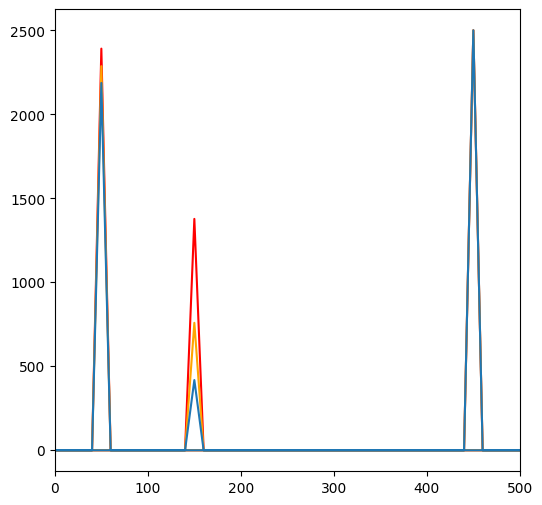

In [217]:
band_stop_filtered_y_cos_fft_base = low_filtered_y_cos_fft_base + high_filtered_y_cos_fft_base
band_stop_filtered_y_cos_fft = band_stop_filtered_y_cos_fft_base * y_cos_fft
band_stop_filtered_y_cos_fft /= max(band_stop_filtered_y_cos_fft) / max(y_cos_fft)

plt.figure(figsize=(6, 6))
plt.xlim([0, 500])

plt.plot(x_cos_fft, np.abs(band_stop_filtered_y_cos_fft), 'red')

band_stop_filtered_y_cos_fft *= band_stop_filtered_y_cos_fft_base
band_stop_filtered_y_cos_fft /= max(band_stop_filtered_y_cos_fft) / max(y_cos_fft)

plt.plot(x_cos_fft, np.abs(band_stop_filtered_y_cos_fft), 'orange')

band_stop_filtered_y_cos_fft *= band_stop_filtered_y_cos_fft_base
band_stop_filtered_y_cos_fft /= max(band_stop_filtered_y_cos_fft) / max(y_cos_fft)

plt.plot(x_cos_fft, np.abs(band_stop_filtered_y_cos_fft))

plt.show()

C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


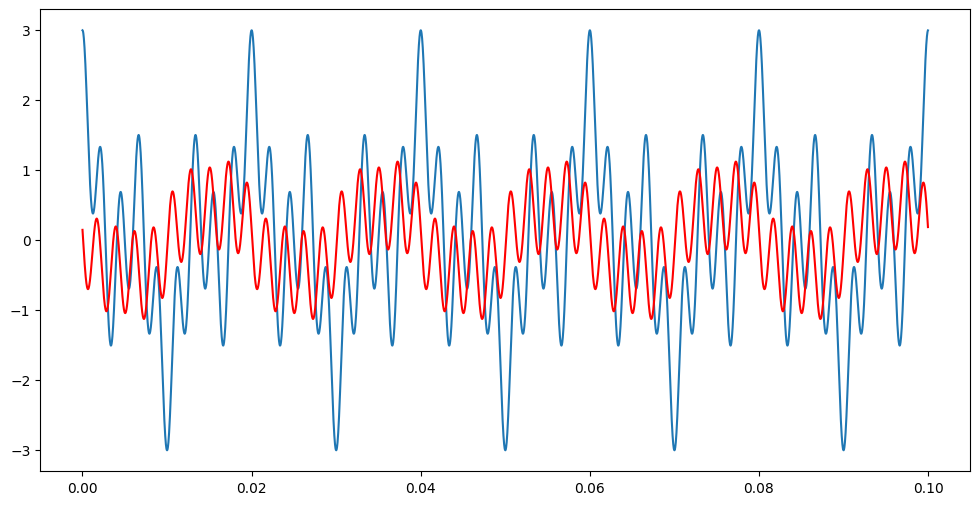

In [219]:
y_cos_from_band_stop = np.fft.ifft(band_stop_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_band_stop, 'red')
plt.show()